# Example 1: How to Generate Synthetic Data (MarginalSynthesizer)
In this notebook we show you how to create a simple synthetic dataset.

# Environment

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import sys

## Jupyter-specific Imports and Settings

In [2]:
# set printing options
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

get_ipython().run_line_magic('autoreload', '2')
from importlib import reload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Synthesizer
For this example we use the MarginalSynthesizer algorithm. As the name suggests, this algorithm generates data via the marginal distributions of each column in the input dataset. In other words, the output synthetic data will have similar counts for each column but the statistical patterns between columns are likely not preserved. While this method is rather naive, it will work with data of any shape or size - and run relatively quickly as well. 

In [4]:
from synthesis.synthesizers.marginal import MarginalSynthesizer

# Synthetic Data Generation
Let's load a dataset to see how the generation process works.

In this case, we will use the adult dataset - source: https://archive.ics.uci.edu/ml/datasets/adult

In [5]:
df_original = pd.read_csv('examples/data/original/adult.csv')
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will now import our synthesizer and fit it on the input data. 

Additionally we can specify the 'epsilon' value, which according to the definition of differential privacy is used to quantify the privacy risk posed by releasing statistics computed on sensitive data. More on that here: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf

In short, a lower value of epsilon will result in more randomness and v.v.

In [6]:
epsilon = 1 # set to float(np.inf) if you'd like to compute without differential privacy.

synthesizer = MarginalSynthesizer(epsilon=epsilon)
synthesizer.fit(df_original)

Marginal fitted: age
Marginal fitted: workclass
Marginal fitted: fnlwgt
Marginal fitted: education
Marginal fitted: education-num
Marginal fitted: marital-status
Marginal fitted: occupation
Marginal fitted: relationship
Marginal fitted: race
Marginal fitted: sex
Marginal fitted: capital-gain
Marginal fitted: capital-loss
Marginal fitted: hours-per-week
Marginal fitted: native-country
Marginal fitted: income


After our synthesizer has fitted the structure of the original data source, we can now use it to generate a new dataset.

In [7]:
# we can specify the number of records by sample(n_records=...), 
# default it generates the same number of records as the input data
df_synthetic = synthesizer.sample()

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


We now obtained a new dataset which looks very similar to the original one.

In [8]:
df_synthetic.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Private,129476,HS-grad,12,Married-civ-spouse,Craft-repair,Own-child,White,Male,0,0,25,United-States,>50K
1,23,Private,470663,7th-8th,6,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
2,46,Federal-gov,211128,Assoc-acdm,9,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
3,28,Private,233312,HS-grad,9,Married-civ-spouse,?,Not-in-family,White,Male,0,0,45,United-States,>50K
4,79,Private,95469,Some-college,14,Married-civ-spouse,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,<=50K


# Evaluation
We can see that the synthetic data has a similar structure the original. We can also evaluate whether it has retained the statistical distributions of the original data. We use the SyntheticDataEvaluator class to compare the synthetic data to the original by applying various metrics.

Note: for more elaborate evaluation techniques we refer to the example notebook on 'evaluating synthetic data'.

In [12]:
from synthesis.evaluation.evaluator import SyntheticDataEvaluator

In [13]:
evaluator = SyntheticDataEvaluator(exclude_columns=['fnlwgt'])
evaluator.fit(df_original, df_synthetic)
evaluator.score()

{'average_js_distance': 0.03867953328013867,
 'pairwise_correlation_distance': 2.6141489626547614}

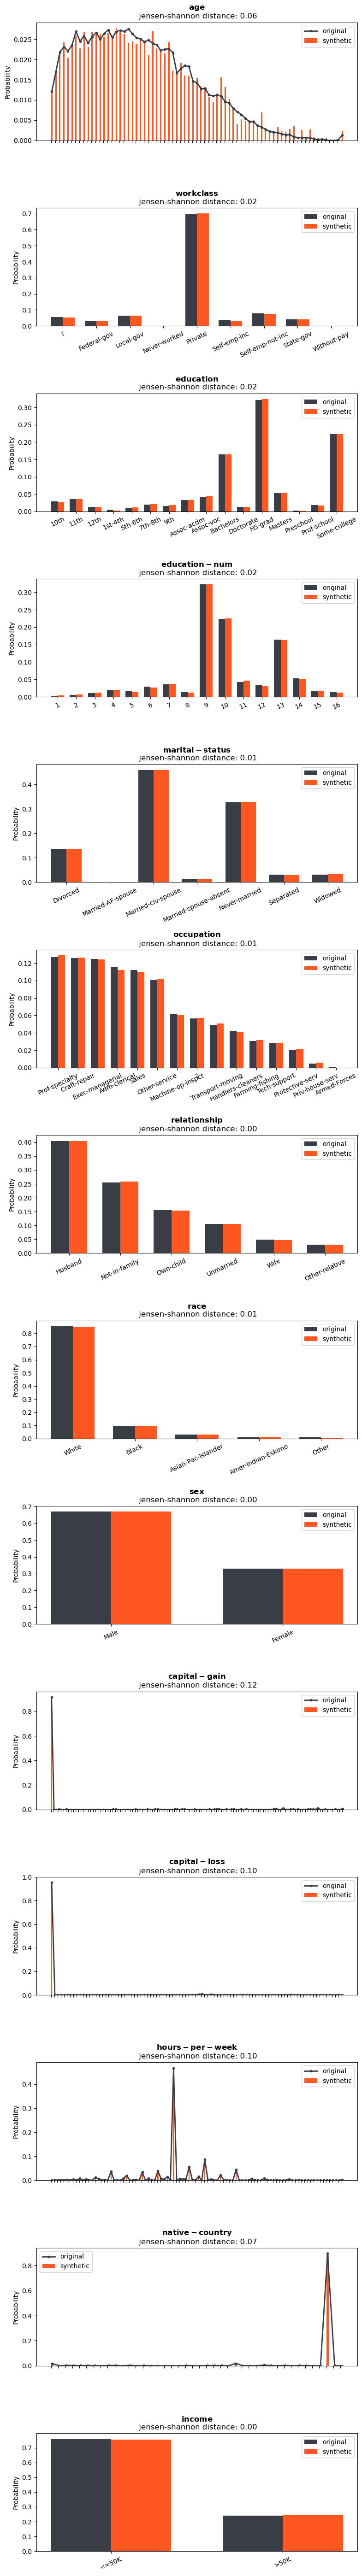

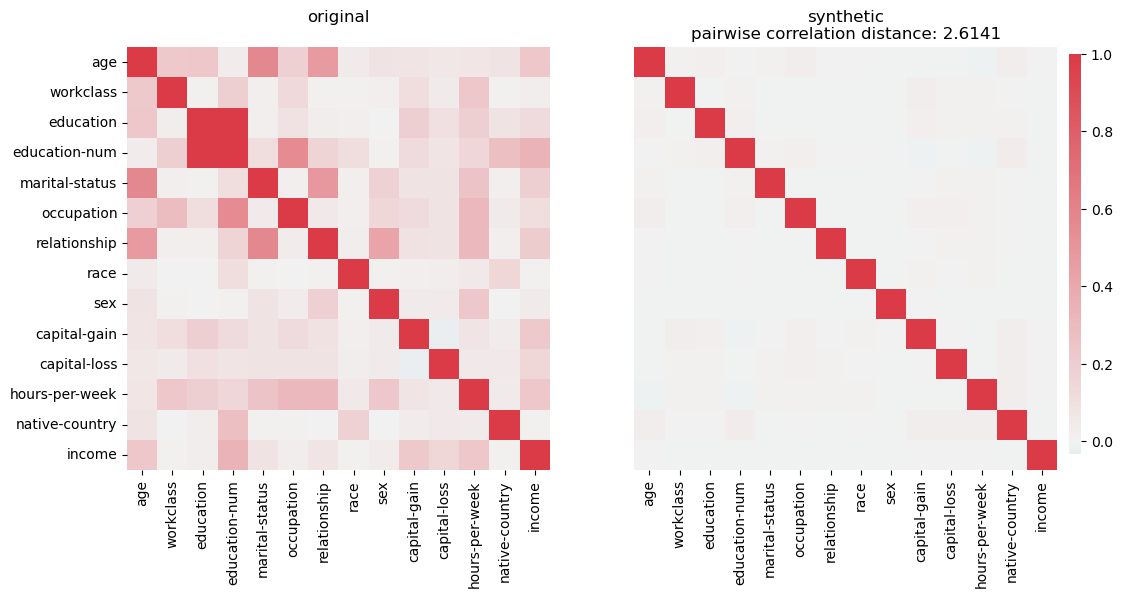

In [14]:
evaluator.plot()

Observe that the marginal distributions are preserved quite well - especially for columns with low dimensionality. When using differentialy private algorithms (like MarginalSynthesizer) it is advised to reduce the dimensionality of the original data by generalizing columns. 

Also observe that the last plot shows the synthetic data did not capture any of the correlations in the original data. This is expected as MarginalSynthesizer synthesizes data by columns independently. 

# Conclusion

We hope that gave you a quick introduction on synthetic data generation. Now go try it on your own data!

In the next example notebook we show how a more sophisticated algorithm is able to preserve statistical patterns between columns in the original data.